In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import decimal  
import sys
import scipy
from sklearn.utils import shuffle
import math
from random import randint
from scipy.spatial import distance

1  round
first round： randomly choose centroid
INITIAL random number : [56]
finish initialize
total dist  878.26
total dist  680.8243999999997
FINAL DIST  680.8243999999997
2  round
first round： randomly choose centroid
INITIAL random number : [137, 6]
finish initialize
total dist  196.62000000000003
total dist  152.5333691004372
total dist  152.36870647733917
FINAL DIST  152.36870647733917
3  round
first round： randomly choose centroid
INITIAL random number : [66, 35, 110]
finish initialize
total dist  109.86000000000003
total dist  82.72975333129274
total dist  80.80686400000003
total dist  79.962979834613
total dist  79.43376414532676
total dist  79.01070972222227
total dist  78.94506582597724
FINAL DIST  78.94506582597724
4  round
first round： randomly choose centroid
INITIAL random number : [48, 42, 22, 135]
finish initialize
total dist  458.16
total dist  148.67592909769454
total dist  125.01677050012204
total dist  95.1904569909066
total dist  81.31573872576737
total dist  77.43

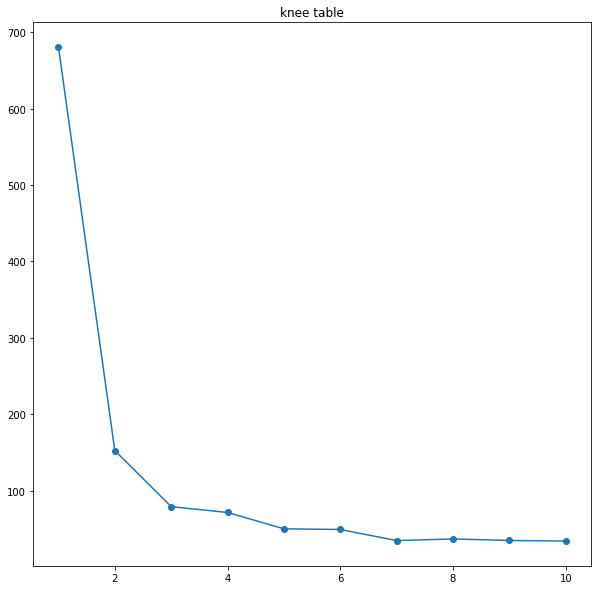

1  round
first round： randomly choose centroid
INITIAL random number : [42]
finish initialize
total dist  2052.8600000000006
FINAL DIST  680.8243999999997
2  round
first round： randomly choose centroid
INITIAL random number : [136, 53]
finish initialize
total dist  572.94
FINAL DIST  253.20689559304952
3  round
first round： randomly choose centroid
INITIAL random number : [21, 85, 63]
finish initialize
total dist  174.00000000000006
FINAL DIST  138.01949554490176
4  round
first round： randomly choose centroid
INITIAL random number : [0, 100, 29, 55]
finish initialize
total dist  99.28000000000002
FINAL DIST  71.75991184895831
5  round
first round： randomly choose centroid
INITIAL random number : [0, 137, 44, 61, 52]
finish initialize
total dist  88.16000000000001
FINAL DIST  63.156022804794446
6  round
first round： randomly choose centroid
INITIAL random number : [4, 68, 108, 117, 122, 95]
finish initialize
total dist  80.84000000000005
FINAL DIST  48.305280368385546
7  round
first rou

<Figure size 432x288 with 0 Axes>

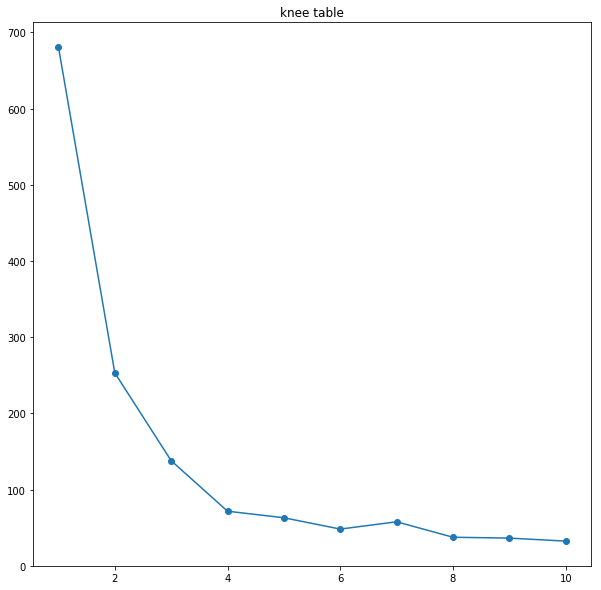

1  round
first round： randomly choose centroid
INITIAL random number : [26]
finish initialize
total dist  1600.1199999999997
total dist  680.8243999999997
FINAL DIST  680.8243999999997
2  round
first round： randomly choose centroid
INITIAL random number : [65, 78]
finish initialize
total dist  762.0100000000001
total dist  347.14948798052893
total dist  200.83352523011183
total dist  157.6201796296297
total dist  152.5333691004372
total dist  152.36870647733917
FINAL DIST  152.36870647733917
3  round
first round： randomly choose centroid
INITIAL random number : [65, 67, 35]
finish initialize
total dist  170.90000000000003
total dist  84.84972293201304
total dist  83.7762949021678
total dist  82.88459452600709
total dist  81.63300278471786
total dist  80.89577599999998
total dist  79.962979834613
total dist  79.43376414532676
total dist  79.01070972222227
FINAL DIST  78.94506582597724
4  round
first round： randomly choose centroid
INITIAL random number : [72, 24, 108, 61]
finish initial

<Figure size 432x288 with 0 Axes>

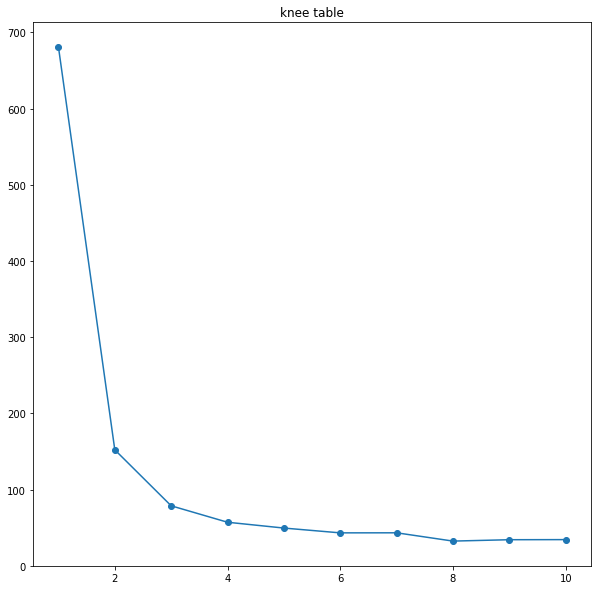

1  round
first round： randomly choose centroid
INITIAL random number : [73]
finish initialize
total dist  833.3000000000001
total dist  680.8243999999997
FINAL DIST  680.8243999999997
2  round
first round： randomly choose centroid
INITIAL random number : [82, 30]
finish initialize
total dist  311.40000000000003
total dist  153.40270399999997
total dist  152.5131040798459
total dist  152.36870647733917
FINAL DIST  152.36870647733917
3  round
first round： randomly choose centroid
INITIAL random number : [100, 71, 143]
finish initialize
total dist  550.14
total dist  301.80676986971275
total dist  158.59006987109902
total dist  86.13179629129371
total dist  79.54225115048625
total dist  78.99945673645703
total dist  78.94084142614598
FINAL DIST  78.94084142614598
4  round
first round： randomly choose centroid
INITIAL random number : [24, 64, 13, 39]
finish initialize
total dist  379.9300000000002
total dist  144.4285118115413
total dist  137.90839800461234
total dist  124.3331273709136
to

<Figure size 432x288 with 0 Axes>

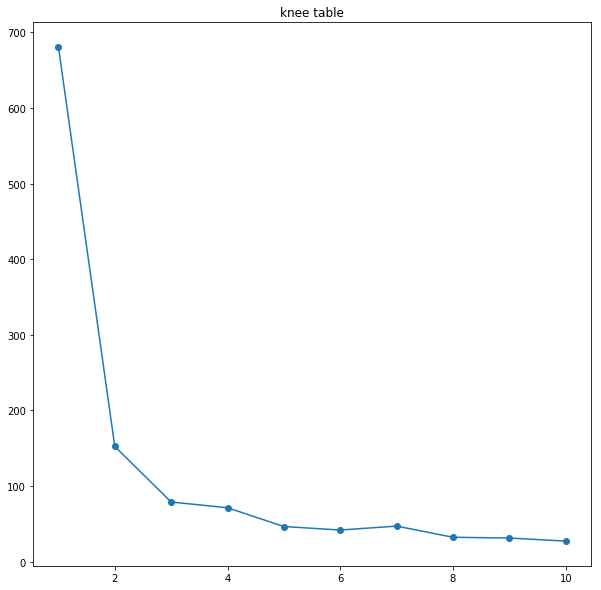

<Figure size 432x288 with 0 Axes>

In [58]:
df = pd.read_csv("iris.data",header = None)
def distance_LP(x,y):# for all element in a row (x-y)^2
    distance=0
    #print ("x: ",x)
    #print ("y: ",y)
    for val1,val2 in zip(x,y):
        val1 = float(val1)
        val2 = float(val2)
        distance += math.pow(abs(val1-val2),2)
    return distance
def k_means_cs171(x_input,K,init_centroid,old_dist,max_iter):#output cluster assinments and cluster centroid
    #print("start k_means")
    n = len(df)
    if init_centroid==None:# if there is no intial centroid, we need to randomly choose some pt as centroids
        print ("first round： randomly choose centroid")
        rand_list =[]
        while len(set(rand_list))!= K:
            rand_list.append(randint(0,n-1))#randint a b => a<= i <= b
            rand_list = list(set(rand_list))
        print ("INITIAL random number :",rand_list)
        #rand_list = [131, 133, 37, 41, 9, 109, 148, 52, 31]#for debug    
        init_centroid = []
        for element in rand_list:# add the the random row of data into initial centroid 
            init_centroid.append(x_input.iloc[element])
        print ("finish initialize")
    total_dist = 0 
    cluster_assign= []
    for i in range(n):# assigmn each row to a cluster
        data = x_input.iloc[i][0:4]#the last column does not need to be included
        which_cluster = -1
        min_dist = 1000000
        for index,centroid in enumerate(init_centroid):
            #dst = distance.euclidean(data,centroid[0:4])
            #print ("centroid[0:4 ] ",centroid)
            dst = distance_LP(data,centroid[0:4])
            #dst = dst*dst
            if dst < min_dist:
                min_dist = dst
                which_cluster = index
        total_dist+=min_dist
        cluster_assign.append(which_cluster)
    init_centroid =[]
    for i in range(K):# create new centroid by average each cluster
        tmp =[]
        for j in range(n):
            if cluster_assign[j] ==i:
                tmp.append(x_input.iloc[j][0:4])
        new_centroid=[sum(i)/len(tmp) for i in zip (*tmp)]#average each item in each element belongs to this cluster
        init_centroid.append(new_centroid)
    max_iter -=1
    if total_dist ==old_dist or max_iter ==0:# it means it will not converge anymore
        print ("FINAL DIST ",total_dist)
        return float(total_dist),cluster_assign,init_centroid
    else:
        print ("total dist ",total_dist)
        return k_means_cs171(x_input,K,init_centroid,total_dist,max_iter)
def cal_error_sensitivity(x_input,cluster_assign,final_centroid):
    print ("THIS IS FOR CALCULATE THE ERROR AND PAINT IT")
    K = len(final_centroid)
    std = []
    mean = []
    for k in range(10):
        
        for j in range(k+1):
            data = []
            for i in range(len(cluster_assign)):
                if cluster_assign[i]==j:
                    dst = distance_LP(x_input.iloc[i][0:4],final_centroid[j])
                    data.append(dst)
        std.append(np.std(data))
        mean.append(np.mean(data))
    print ("std",std)
    print ("mean",mean)
#dst,cluster_assign,final_centroid = k_means_cs171(df,9,None,-1,20)

iter_num = [-1,2,10,100]# -1 means there is no max_iter    
for index in range(4):
    max_iter = iter_num[index]
    y_val = []
    for i in range(1,11):
        print (i," round")
        dst,cluster_assign,final_centroid = k_means_cs171(df,i,None,-1,max_iter)
        y_val.append(dst)
    #print (y_val)
    cal_error_sensitivity(df,cluster_assign,final_centroid)
    plt.figure(figsize=(10,10))
    plt.axis('on')
    plt.title("knee table")
    plt.plot(np.arange(1,11),y_val,'-o')
    plt.show()
    plt.savefig("knee_for_infinite_iter"+str(max_iter))


In [44]:


cluster = df.iloc[np.r_[0:10],0:4]
for i in range(5): 
    print (cluster.iloc[i][0:3])
print (cluster.head(5))

0    5.1
1    3.5
2    1.4
Name: 0, dtype: float64
0    4.9
1    3.0
2    1.4
Name: 1, dtype: float64
0    4.7
1    3.2
2    1.3
Name: 2, dtype: float64
0    4.6
1    3.1
2    1.5
Name: 3, dtype: float64
0    5.0
1    3.6
2    1.4
Name: 4, dtype: float64
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [118]:
l = ([3,7,2],[1,4,5],[9,8,7])
for i in zip(*l):
    print (i)

(3, 1, 9)
(7, 4, 8)
(2, 5, 7)
